
 
 Важной характеристикой матрицы, а также линейного преобразования, заданного этой матрицей, является
спектр — набор собственных векторов и соответствующих собственных значений.
Собственным вектором линейного преобразования $A$ называется такой ненулевой вектор  $x\in V$ , что для
некоторого $\lambda\in R$ выполняется $A x\in \lambda x$

#### Методы оптимизации
* **Метод имитации отжига** <br>
функция anneal (англ. отжиг) в модуле optimize/позволяет оптимизировать **негладкие** функции
библиотеки SciPy.
* **Метод Нелдера-Мида**, он же **симплекс метод** использвуется для оптимизации функций негладких и зашумленных
<br>Метод Нелдера-Мида является методом
оптимизации по умолчанию в функции SciPy.optimize.minimize,особенно хорошо работает, если перед ним применить метод грубой оптимизации(например поиск по сетке)

# Обучение на размеченных данных
* $\mathbb{X}$ -пространство объектов
* $\mathbb{Y}$ -пространство ответов
* $x=(x^1,...,x^d)$ -признаковое описание
* $X=(x_i,y_i)^l_{i=1}$ -обучающая выборка
* $ a(x)$ -алгоритм ,модель
* $ Q(a,X)$ -функционал ошибки алгоритма на выборке $X$
* обучение:$a(x)=argmin\,Q(a,X),a\in A$

То есть,цель обучения минимизировать функциал ошибки, подобрав соответвующий алгоритм из семейства A
## Линейные модели
Рассмотрим задачу о предсказании прибыли по данным продаж предыдущего месяца.<br>
Видим, что можно провести прямую, более менее угадывающую зависимость между признаками.

![linear_model](../img/linear_model.png)

Но как правило признаков несколько(то есть имеем дело с многомерными выборками)<br>
**общий вид линейной модели**:
$$a(x)=w_o+\sum^d_{j=1}w_jx^j$$
$w_i$-веса модели перед соотвествующими признаками $w_0$- свободный коэффициент, он же сдвиг, он же **bias**<br>
другой вариант записи(без сдвига):
$$a(x)=\sum^{d+1}_{j=1}w_jx^j=\langle w,x \rangle$$
### Среднеквадратичная ошибка
$$Q(a,X)=\frac{1}{l}\sum^l_{i=1}(a(x_i)-y_i)^2$$
матричная запись:
$$Q(a,X)=\frac{1}{l}||Xw-y||^2$$ где $l$-число объектов,$X$-матрица признаков,$w$ -вектор весов,$y$-вектор ответов
### Линейная регрессия
$$ Q (w,x)=\frac{1}{l}\sum_{l=1}^{l} (\langle w{,}x \rangle-y_i)^2 \to \min\limits_{w}    $$
То есть задача найти модель, с минимальной ошибкой, то есть переходим к задаче оптимизации.<br>
Среднеквадратичная ошибка-выпуклая(следовательно один минимум) и гладкая функция (значит можно рассчитать градиент).
#### Градиентный спуск.
1. инициализация вектора весов(например нулями) $w^0=0$
2. цикл по $t=1,2,3...$ -итерации <br>
$w^t=w^{t-1}-\eta_t \nabla Q(w^{t-1},X)$,если $||w^t-w^{t-1}||<\epsilon$, то завершить<br>
где $\nabla Q$ -градиент,<br>$\eta_t$ -шаг градиентного спуска(параметр)<br><br>
То есть,обновляем вектор весов до сходимости<br>
Функционал качества в зависимости от итерации,видим, что начиная с определенного номера выходит на ассимптоду:

![quality](../img/quality.png)
Очень важно в градиентном спуске выбрать размер шага $\eta$:<br>
Если взять шаг маленьким, то градиенту понадобится много итераций для достижения минимума,если взять слишком большим- начнет перескакивать точку минимума.

![gradientstep](../img/gradientstep.png)
Неплохо работает:$\eta_t=\frac{k}{t}$,где $k$- константа(надо подбирать)
#### Стохастический градиентный спуск(cокращенное наименование:**SGD**)
1. инициализация вектора весов(например нулями) $w^0=0$
2. цикл по $t=1,2,3...$ -итерации <br>
выбрать случайный объект $x_i$ из $X$<br>
$w^t=w^{t-1}-\eta_t \nabla Q(w^{t-1},{x_i})$,если $||w^t-w^{t-1}||<\epsilon$, то завершить<br>

Таким образом,на каждом шаге уменьшаем ошибку не на всей выборке, а на случайном объекте.<br>
Преимущества:
* быстрее выполняется один шаг
* не требует хранения выборки в памяти и таким образом позволяет работать с очень большими данными
* подходит для онлайн-обучения
### Линейная классификация
задача бинарной классификации:$\mathbb{Y}=\{-1,+1\}$<br>
**линейный классификатор**
$$a(x)=sign\,\sum^{d+1}_{j=1}w_jx^j=sign\,\langle w,x \rangle$$

Линейный классификатор разделяет два класса гиперплоскостью:

![geomlinclass](../img/geomlinclass.png)
расстояние от точки до гиперплоскости со знаком:<br>$\frac{|\langle w,x \rangle|}{||w||}$

То есть классификатор вначале измеряет расстояние от точки до гиперплоскости и далее смотрит лишь на знак.<br>
**отступ**<br>
* $M_i=y_i\langle w,x_i \rangle, y_i=\{-1,+1\}$ 
* $M_i>0$-классификатор дает верный ответ
* $M_i<0$классификатор ошибается

Чем дальше отступ от нуля, тем больше уверенности<br>
**функционал качества**
доля неправильных ответов:<br>
$Q(a,X)=\frac{1}{l}\sum^l_{i=1}[a(x_i)\not= y_i]$<br>
доля неправильных ответов через отсутп:<br>
$Q(a,X)=\frac{1}{l}\sum^l_{i=1}[M_i<0]$<br>

Эта функция разрывна в нуле и из за этого ее нельзя оптимизировать градиентными методами(можно воспользоваться методами негладкой оптимизации , но они сложны в реализации и не дают гарантии сходимости к локальному оптимуму)<br>
Поэтому будем оптимизировать любую гладкую оценку пороговой функции:$$[M<0]\leq \tilde{L}(M)$$
Оценим через нее функционал ошибки:
$$Q(a,x)\leq \tilde{Q}(a,X)=\frac{1}{l}\sum^l_{i=1}\tilde{L}(M_i)$$
Таким образом,мы **надеемся**,что минимизируя верхнюю оценку и минимизируем то, что она оценивает,но ,разумееется нет никаких гарантий.<br> примеры оценок:
* логистическая $\tilde{L}(M)=ln(1+exp(-M)$
* экспоненициальная $\tilde{L}(M)=exp(-M)$
* кусочно линейная $\tilde{L}(M)=max(0,1-M)$

### Проблема переобучения
* **недообучение**- плохое качество и на обучении и на новых данных
* **переобучение**- хорошее качество  на обучении и плохое на новых данных ,то есть модель хорошо описывает текущие данные , но обладает плохой обобщающей способностью<br>

Как выявить переобучение?:
* отложеннаая выборка -данные , на которых не обучались
* кросс валиадация(пояснение ниже)
* меры сложности модели

##### Регуляризация(контроль сложности модели)
нужна для:
* борьба со сложностью модели
* борьба с линейностью признаков (мультиколлинеарность)

Симптомом переобучения являются большие веса при коээфициентах.И поэтому будем штрафовать модель за большие веса.<br>
**квадратичный регуляризатор** $$ ||w||_2 =\sum_{j=1}^{d} w_{j}^2 $$
новый функционал ошибки :
$$Q(w,X)+ \lambda ||w||^2 \to \min\limits_{w}  $$
То есть, мы будем стремиться получить ошибку как можно меньше , при этом стараться не сильно увеличив веса
* чем больше $\lambda$, тем ниже сложность модели
* чем меньше $\lambda$, тем выше риск переобучения
* выбор $\lambda$ по кросс валидации

**виды регуляризаторов**<br>
* $ ||w||_2 =\sum_{j=1}^{d} w_{j}^2  -L_2 регуляризатор$  **ridge** (гребневый) -**частый выбор** <br>
гладкий и выпуклый(не усложняет оптимизацию)

* $ ||w||_1 =\sum_{j=1}^{d} |w_{j}| -L_1 регуляризатор $  **lasso**

$L_1$-регуляризатор:
* Негладкий(сложнее оптимизировать)
* Некоторые веса оказываются нулевыми(за счет этого можно отбирать признаки)

##### Отложенная выборка
* разбиваем выборку на 2 части
* на одной обучаем алгоритм
* на второй измеряем качество

обычно берут разбиение : 70%/30% ,80%/20% 
* (+) обучаем алгоритм один раз (подходит если данных очень много)
* (-) завим от разбиения(результат качества сильно зависит от того , как выбираем отложенную выборку)

улучшение -много отложенных выборок

* разбиваем выборку n раз
* усредним получившиеся оценки и получим итоговую оценку

по прежнему нет гарантии того, что каждый объект побывает в обучающей выборке.<br>
Более системный подход- кроссвалидация.
##### Кросс-Валидация 
* разбиваем выборку на k блоков
* каждый блок по очереди выступает как тестовый , на остальных обучаемся
* усредним их и получим оценку качество
![crossval](../img/crossval.png)
мало блоков:
*(+) надежные оценки
*(-) смещенные оценки

много блоков:
*(-) ненадежные оценки
*(+) несмещенные оценки

* обычно:k=3,5,10

* чем больше выборка, тем меньше нужно $k$

##### Совет
* перемешивайте выборку(если не предсказываете будующее)
### Гиперпараметры

те параметры, которые нельзя настроить по обучающей выборку<br>
примеры: параметры регуляризации, стень полинома

более обще:
* функционал ошибки
* алгоритм

схема подбора:
* разбиваем выборку на обучающую и контроль
* на обучающей выборке по кроссвалиации обучаем и сравниваем  алгоритм
* проверяем на контрольной

# Метрики качества в задачах регрессии
зачем нужны:

* для задания функционала ошибки(используется при обучении)
* для подбора гиперпараметров( используется для измерения качества на кросс валидации)
* для оценивая итоговой модели(пригодна получившая модель для решения бизнес задачи)
## Метрики качества в задачах регрессии

* $MSE(a,X)=\frac{1}{l}\sum_{i=1}^l(a(x_i)-y_i)^2$ - среднеквадратичная ошибка ,легко оптизируется,но
<br> подстраивается под выбросы(что плохо)
*  $MAE(a,X)=\frac{1}{l}\sum_{i=1}^l|a(x_i)-y_i|$ -считается модуль отклонения, а не квадрат <br>штраф за выборсы ниже
* коэффициент детерминации $$ R^2(a,X)=1-\frac{\sum_{i=1}^{l} (a(x_i)-y_i)^2}{\sum_{i=1}^{l} (y_i-\bar{y})^2} ,$$
$ \bar{y}=\frac{1}{l}\sum_{i=1}^{l} y_i $ -средний ответ

-некоторая модификация среднеквадратичной ошибки<br>
Показывает долю дисперсии, объясненной общей моделью
* $0 \leq R^2 \leq 1$ для разумных моделей
* $ R^2 =1$ идеальная модель
* $ R^2 =0$ модель на уровне константной
* $ R^2 < 0$ модель хуже константной


**квантильная ошибка ** <br> используется если ошибки прогноза(перепрогноз или недопрогноз имеют разную цену

$\rho_{\tau}(a,X)=\frac{1}{l}\sum_{i=1}^l ((\tau-1)[y_i<a(x_i)]+\tau[y_i\geq a(x_i)])(y_i-a(x_i))$,<br>
если $\tau$ близко к нулю ,мы боимся перепрогноза, если $\tau$ ,близко к 1 -боимся недопрогноза

#### вероятностный смысл

* **MSE** -средний ответ
* **MAE** - медиана ответов
* **квантильная ошибка** - $\tau$ квантиль


## Метрики качества в задачах классификации
* **доля правильных ответов(accuracy)**:<br> $$accuracy(a,X)=\frac{1}{l}\sum_{i=1}^{l} [a(x_i)=y_i]$$<br>проблема- несбаллансированные выборки<br> Для этого введем $q_0$ -доля объектов самого крупного класса выборки<br>
и для разумных алгоритмов $accuracy \in [q_0,1]$
##### Матрица ошибок

|   |  y=1 | y=-1  |  
|---|---|---|---|---|
| a(x)=1  | True Positive(TP)  | False Positive(FP)  |  
|a(x)=-1   | False Negative (FN)  | True Negative (TN)  |

* **точность** (насколько верно алгоритм относит объекты к первому классу) $$precision(a,X)=\frac{TP}{TP+FP}$$
* **Полнота**(как много истинных объектов первого класса выделяет алгоритм) $$recall(a,X)=\frac{TP}{TP+FN}$$
* **F мера - объедиение точности и полноты** $$F=\frac{2*precison*recall}{precison+recall}$$ <br>**расширенная версия F меры**
$$F_\beta=(1+\beta^2)*\frac{precision+recall}{\beta^2*precision+recall}$$ <br> если $\beta=0.5 $ получим важнее полнота,если $\beta=2 $ то важнее точность

### Качество оценок классификатора

* **PR -кривая **<br>Ось X - полнота<br>Ось Y - точность<br>точки-классификаторы при определённых порогах
![prsq](../img/prsq.png)
<br> Левая точка (0,0) <br> Правая точка (1,r),где **r** -доля положительных объектов <br>Для идеального классификатора проходит через (1,1)<br> **AUC-PRC** -площадь под PR-кривой
* **POC -кривая **<br>Ось X - FalsePositiveRate$$FPR=\frac{FP}{FP+TN}$$<br>Ось Y - TruePositiveRate $$TPR=\frac{TP}{TP+FN}$$<br>
![rocsq](../img/rocsq.png)
**AUC-ROC** -площадь под ROC-кривой

идеальный алгоритм даст площади AUC-PRC и AUC-ROC равными 1, худший -0.5 <br>
Площадь под ROC кривой **не зависит** от баланса классов и обладает следующей интерпритацией:
Площадь под ROC кривой = вероятности того, что если выбрать случайный положительный и случайный отрицательный объект из выборки,то положительный объект получит оценку принадлежности выше чем отрицательный.

<br>**AUC-PRG** -выразительнее в случае дисбаланса классов

# Примеры (python)

### Cross Validation

In [1]:
from sklearn import model_selection, datasets,linear_model, metrics
import numpy as np
import pandas as pd
import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ilya.Volchkov\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Разовое разбиение данных на обучение и тест с помощью train_test_split
на iris датасете

In [2]:
iris=datasets.load_iris()
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris.data, iris.target, 
                                                                                     test_size = 0.3)

#### KFold
важно:возвращает индексы, а не данные

In [3]:
X=np.array(range(10))
target = np.array([0] * 5 + [1] * 5)
pd.DataFrame(list(zip(X,target)),columns=['X','y'])

,X,y
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


Разбиваем на k фолдов(частей)

In [4]:
for train_indices, test_indices in model_selection.KFold( n_splits = 5, shuffle = True, random_state = 1).split(X):
    print( train_indices, test_indices)

[0 1 3 4 5 6 7 8] [2 9]
[0 1 2 3 5 7 8 9] [4 6]
[1 2 4 5 6 7 8 9] [0 3]
[0 2 3 4 5 6 8 9] [1 7]
[0 1 2 3 4 6 7 9] [5 8]


#### StratifiedKFold
разбиваем на k частей , учитывая балланс классов(стараемся его сохранить)

In [5]:
# target- метки классов
target = np.array([0] * 5 + [1] * 5)
for train_indices, test_indices in model_selection.StratifiedKFold(n_splits=5, shuffle = True, random_state = 0).split(X,target):
    print (train_indices, test_indices)

[0 1 3 4 6 7 8 9] [2 5]
[1 2 3 4 5 6 8 9] [0 7]
[0 2 3 4 5 7 8 9] [1 6]
[0 1 2 4 5 6 7 8] [3 9]
[0 1 2 3 5 6 7 9] [4 8]


#### ShuffleSplit

In [6]:
for train_indices, test_indices in model_selection.ShuffleSplit( n_splits = 10, test_size = 0.2).split(X):
    print (train_indices, test_indices)

[3 4 1 0 2 6 7 5] [9 8]
[6 1 9 2 5 4 7 8] [3 0]
[4 1 6 3 9 7 8 0] [2 5]
[8 1 7 5 6 0 3 2] [9 4]
[0 5 6 4 9 7 1 3] [8 2]
[5 7 8 3 4 1 2 0] [9 6]
[8 2 4 1 6 3 5 7] [9 0]
[8 1 0 2 7 9 5 6] [4 3]
[5 0 1 6 2 3 4 8] [9 7]
[8 6 3 4 7 9 0 1] [5 2]


#### StratifiedShuffleSplit

In [7]:
for train_indices, test_indices in model_selection.StratifiedShuffleSplit(n_splits = 4, test_size = 0.2).split(X,target):
    print (train_indices, test_indices)

[2 8 9 5 1 0 7 3] [4 6]
[6 8 7 2 0 1 3 9] [4 5]
[2 5 6 8 3 9 1 4] [7 0]
[9 8 1 3 2 0 7 5] [4 6]


#### Leave-One-Out

In [8]:
for train_indices, test_index in model_selection.LeaveOneOut().split(X):
    print (train_indices, test_index)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [9]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=1)
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

# Задачи классификации

#### RidgeClassifier

In [10]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [11]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [12]:
print(ridge_classifier.coef_)
print(ridge_classifier.intercept_ )

[[-0.0854443  -0.07273219]]
[-0.31250723]


In [13]:
ridge_classifier.intercept_ 

array([-0.31250723])

#### LogisticRegression

In [14]:
log_regressor = linear_model.LogisticRegression(random_state = 1)
log_regressor.fit(train_data, train_labels)
lr_predictions = log_regressor.predict(test_data)
# выводим вероятности принадлежности к классам
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [15]:
print (metrics.accuracy_score(test_labels, lr_predictions))
print (metrics.accuracy_score(test_labels, ridge_predictions))

0.8
0.866666666667


### Оценка качества по cross-validation
#### cross_val_score

In [16]:
#For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)
print(ridge_scoring)
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)
print(lr_scoring)

[ 0.8  0.9  0.9  0.9  1.   1.   0.7  0.9  0.9  0.8]
[ 0.7  0.9  0.9  0.9  1.   1.   0.7  0.9  0.9  0.8]


In [17]:
print ('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))
print ('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Ridge mean:0.8800000000000001, max:1.0, min:0.7, std:0.08717797887081348
Log mean:0.8700000000000001, max:1.0, min:0.7, std:0.10049875621120892


#### cross_val_score с заданными scorer и cv_strategy

In [18]:
scorer = metrics.make_scorer(metrics.accuracy_score)
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits = 4, test_size = 0.2)
ridge_scoring =model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)
print ('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))
print ('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Ridge mean:0.8500000000000001, max:0.95, min:0.75, std:0.07905694150420946
Log mean:0.875, max:0.9, min:0.85, std:0.025000000000000022


## Метрики качества в задачах классификации

#### accuracy

In [19]:
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

####  confusion matrix

In [20]:
metrics.confusion_matrix(test_labels, ridge_predictions)

array([[14,  4],
       [ 0, 12]])

#### precision 

In [21]:
metrics.precision_score(test_labels, ridge_predictions, pos_label = 1),metrics.precision_score(test_labels, ridge_predictions, pos_label = 0)

(0.75, 1.0)

#### recall

In [22]:
metrics.recall_score(test_labels, ridge_predictions, pos_label = 1),metrics.recall_score(test_labels, ridge_predictions, pos_label = 0)

(1.0, 0.77777777777777779)

#### f1

In [23]:
metrics.f1_score(test_labels, ridge_predictions, pos_label = 0),metrics.f1_score(test_labels, ridge_predictions, pos_label = 1)

(0.87500000000000011, 0.8571428571428571)

#### classification report

In [24]:
print( metrics.classification_report(test_labels, ridge_predictions))

             precision    recall  f1-score   support

          0       1.00      0.78      0.88        18
          1       0.75      1.00      0.86        12

avg / total       0.90      0.87      0.87        30



#### ROC curve

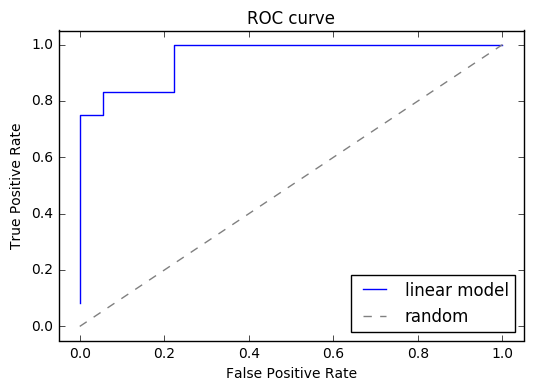

In [25]:
fpr, tpr, _ = metrics.roc_curve(test_labels, lr_proba_predictions[:,1])
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right");

#### ROC AUC

In [26]:
print(metrics.roc_auc_score(test_labels, ridge_predictions))
print(metrics.roc_auc_score(test_labels, lr_proba_predictions[:,1]))

0.888888888889
0.958333333333


#### PR AUC

In [27]:
metrics.average_precision_score(test_labels, ridge_predictions)

0.875

#### log_loss
чем меньше метрика, тем лучше

In [28]:
metrics.log_loss(test_labels, lr_proba_predictions[:,1])

0.35185364928848134

# Задачи регрессии

In [29]:
from matplotlib.colors import ListedColormap
from sklearn import linear_model

#### Генерация данных

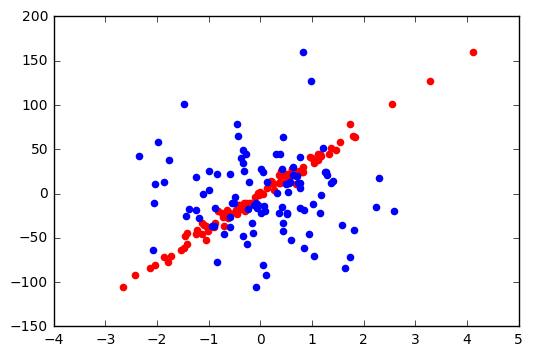

In [30]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)
pylab.scatter(list(map(lambda x:x[0], data)), target, color = 'r')
pylab.scatter(list(map(lambda x:x[1], data)), target, color = 'b');

In [31]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [32]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)
print (test_labels)
print (predictions)
print(metrics.mean_absolute_error(test_labels, predictions))

[ -52.37232463   41.95683853  -61.47026695  -84.32102748  126.64909941
  -21.47606913  -45.27502383  -11.18242389   -0.74051877   18.17188553
   49.41686419   19.66406455  -22.64686884   64.70214251   13.31981235
   11.06961035  -27.02798161   10.33267887   64.19559505   14.76930132
  -35.32062686   17.64282734   51.87072011  -80.80239408   39.70663436
   22.13032804  -36.69728864   34.35183007  -10.06708677  -44.51417742]
[ -40.82558721   46.29712728  -57.174697    -82.64534324  126.53807404
  -17.646268    -48.44284229  -12.07920494    2.23871454   20.07924255
   57.02410697   26.93589538  -17.39687478   69.58999605   14.8479796
   27.74126588  -23.94660126    9.45092868   70.96938999    7.73232465
  -42.59743261   20.85628259   52.66666264  -78.4516698    39.0068076
   21.27381335  -26.37803673   40.25097095   -7.87593508  -54.50132513]
4.64436347664


In [33]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779695, std: 1.0737104492890204


In [34]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [35]:
print(linear_regressor.coef_)
print(linear_regressor.intercept_)
print ("y = {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.coef_[0], linear_regressor.coef_[1]))

[ 38.58531354  -0.31014876]
0.289180847617
y = 38.59*x1 + -0.31*x2


#### Lasso

In [36]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print ('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))
print ("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

mean: 4.154478246666398, std: 1.0170354384993348
y = 37.74*x1 + -0.00*x2


#### mean absolute error

In [37]:
metrics.mean_absolute_error(test_labels, lasso_predictions)

4.5066204243124615

#### mean squared error

In [38]:
metrics.mean_squared_error(test_labels, lasso_predictions)

32.71039851558551

#### root mean squared error

In [39]:
sqrt(metrics.mean_squared_error(test_labels, lasso_predictions))

5.7193005267764612

#### r2 score

In [40]:
metrics.r2_score(test_labels, lasso_predictions)

0.9848357338405328

### Линейные модели рекомендации
* масштабирование признаков <br>
вычисляем среднее значение и стандартное отклонение <br>
$$\mu_j=\frac{1}{l}\sum_{i=1}^{l} x_i^j $$ $$\sigma_j=\sqrt{\sum_{i=1}^{l}( x_i^j-\mu_j)^2}$$
**Стандартизация(нормализация)**$$x_i^j:=\frac{ x_i^j-\mu_j}{\sigma_j}$$ **масштабирование на отрезок [0,1]**$$m_j=min(x_1^j,...,x_l^j)$$$$M_j=max(x_1^j,...,x_l^j)$$$$x_i^j:=\frac{ x_i^j-m_j}{M_j-m_j}$$

### Использование спрямляющих пространств
к примеру: если модель плохо описывает данные , можно попробовать добавть полиномы высого порядка(при степени равной 2 -добавляем новые признаки , равные квадратам исходных+ попарные произведения <br>**логарифмирование**$$x_i \to ln(x_i+1)$$$$x_i \to ln(|x_i|+1)$$

### Категориальные признаки
используем бинарное кодирование(если признак принимает n значений, добавляем n признаков и кодируем каждое значение вектором из 0 и 1
### Несбаллансированные выборки
*undersampling( выкидываем часть объектов)
*oversampling( дополням часть объектов)

*стратификация

In [41]:
from sklearn import  datasets, linear_model, metrics,model_selection
import numpy as np
import pandas as pd

In [42]:
iris = datasets.load_iris()
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris.data, iris.target, 
                                                                                     test_size = 0.3,random_state = 0)
#создаем модель
classifier = linear_model.SGDClassifier(random_state = 0)

### Генерация сетки

In [43]:
classifier.get_params().keys()

dict_keys(['n_jobs', 'fit_intercept', 'l1_ratio', 'epsilon', 'shuffle', 'power_t', 'eta0', 'loss', 'random_state', 'warm_start', 'verbose', 'average', 'learning_rate', 'class_weight', 'penalty', 'alpha', 'n_iter'])

In [44]:
#задаем параметры для перебора
parameters_grid = {
    'loss' : ['hinge', 'log', 'squared_hinge', 'squared_loss'],
    'penalty' : ['l1', 'l2'],
    'n_iter' : list(range(5,10)),
    'alpha' : np.linspace(0.0001, 0.001, num = 5),
}
 
#cv =model_selection.StratifiedShuffleSplit(n_splits =10, test_size = 0.2).split(train_data, train_labels)
#cv = model_selection.StratifiedShuffleSplit(train_labels, n_iter = 10, test_size = 0.2, random_state = 0)
cv=model_selection.StratifiedShuffleSplit(n_splits = 10, test_size = 0.2)#.split(train_data, train_labels)

### Подбор параметров и оценка качества
#### Grid search

In [45]:
grid_cv = model_selection.GridSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = cv)

In [46]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 8.43 s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge', 'log', 'squared_hinge', 'squared_loss'], 'penalty': ['l1', 'l2'], 'n_iter': [5, 6, 7, 8, 9], 'alpha': array([ 0.0001 ,  0.00032,  0.00055,  0.00078,  0.001  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [47]:
grid_cv.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_hinge', n_iter=9, n_jobs=1,
       penalty='l1', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)

In [48]:
print (grid_cv.best_score_)
print (grid_cv.best_params_)

0.909523809524
{'loss': 'squared_hinge', 'penalty': 'l1', 'n_iter': 9, 'alpha': 0.001}


#### Randomized grid search

In [49]:
%%time
randomized_grid_cv = model_selection.RandomizedSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = cv, n_iter = 20, 
                                                   random_state = 0)
randomized_grid_cv.fit(train_data, train_labels)

Wall time: 940 ms


In [50]:
print (randomized_grid_cv.best_score_)
print (randomized_grid_cv.best_params_)

0.871428571429
{'loss': 'squared_hinge', 'penalty': 'l1', 'n_iter': 8, 'alpha': 0.00077500000000000008}


### Scaling

In [51]:
from sklearn.preprocessing import StandardScaler,FunctionTransformer,OneHotEncoder
#создаем стандартный scaler
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

### Pipeline

In [52]:
from sklearn.pipeline import Pipeline,FeatureUnion
#создаем pipeline из двух шагов: scaling и классификация
pipeline = Pipeline(steps = [('scaling', scaler), ('classifier', classifier)])
pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

0.066666666666666666

### Pipeline Подбор параметров

In [53]:
pipeline.get_params().keys()

dict_keys(['steps', 'classifier__random_state', 'classifier__shuffle', 'classifier__epsilon', 'classifier__average', 'classifier__power_t', 'classifier__class_weight', 'classifier__n_jobs', 'classifier__penalty', 'classifier__learning_rate', 'classifier__verbose', 'scaling__copy', 'scaling__with_mean', 'scaling', 'classifier__warm_start', 'scaling__with_std', 'classifier__n_iter', 'classifier__l1_ratio', 'classifier', 'classifier__loss', 'classifier__eta0', 'classifier__fit_intercept', 'classifier__alpha'])

In [54]:
parameters_grid = {
    'regression__loss' : ['huber', 'epsilon_insensitive', 'squared_loss', ],
    'regression__n_iter' : [3, 5, 10, 50], 
    'regression__penalty' : ['l1', 'l2', 'none'],
    'regression__alpha' : [0.0001, 0.01],
    'scaling__with_mean' : [0., 0.5],
}
grid_cv = model_selection.GridSearchCV(pipeline, parameters_grid, scoring = 'mean_absolute_error', cv = 4)

In [55]:
pipeline.steps

[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('classifier',
  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
         eta0=0.0, fit_intercept=True, l1_ratio=0.15,
         learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
         penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
         warm_start=False))]

In [56]:
# ести нужно разделять признаки:
estimator = Pipeline(steps = [       
    ('feature_processing', FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing',Pipeline(steps = [
                ('selecting', FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
            ('categorical_variables_processing',Pipeline(steps = [
                ('selecting', FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])),
    ('model_fitting', classifier)
    ]
)